# Data Visualization in Python


* Today's session will introduce the Seaborn charting library to improve basic charts, and create other chart types:
    * box plots
    * violin plots
    * strip plots
    * univariate distributions
    * bivariate distributions
    * multivariate distributions (pair plots)


In [6]:
import pandas as pd

sf1store = pd.HDFStore('data/bay_sf1_small.h5')
sf1 = sf1store['sf1_extract']
print(sf1[:5])
print(sf1.shape)

   logrecno        blockfips state county   tract  blkgrp block  arealand  \
0        25  060014271001000    06    001  427100       1  1000         0   
1        26  060014271001001    06    001  427100       1  1001     79696   
2        27  060014271001002    06    001  427100       1  1002       739   
3        28  060014271001003    06    001  427100       1  1003     19546   
4        29  060014271001004    06    001  427100       1  1004     14364   

   P0010001  P0020001  ...  H0040003  H0040004  H0050001  H0050002  H0050003  \
0         0         0  ...         0         0         0         0         0   
1       113       113  ...         1         4         0         0         0   
2         0         0  ...         0         0         0         0         0   
3        29        29  ...         0         7         3         0         0   
4        26        26  ...         0         6         0         0         0   

   H0050004  H0050005  H0050006  H0050007  H0050008  
0 

Let's calculate some basic information about each census block in the Bay Area.

In [51]:
sf1['pct_rent'] = sf1['H0040004'] / sf1['H0040001'] * 100
sf1['pct_black'] = sf1['P0030003'] / sf1['P0030001'] * 100
sf1['pct_asian'] = sf1['P0030005'] / sf1['P0030001'] * 100
sf1['pct_white'] = sf1['P0030002'] / sf1['P0030001'] * 100
sf1['pct_hisp'] = sf1['P0040003'] / sf1['P0040001'] * 100
sf1['pct_vacant'] = sf1['H0050001'] / sf1['H00010001'] * 100
sf1['pop_sqmi'] = (sf1['P0010001'] / (sf1['arealand'] / 2589988))
sf1 = sf1[sf1['P0030001']>0]
print(sf1.head())
print(sf1.shape)

   logrecno        blockfips state county county_name   tract  blkgrp block  \
1        26  060014271001001    06    001     Alameda  427100       1  1001   
3        28  060014271001003    06    001     Alameda  427100       1  1003   
4        29  060014271001004    06    001     Alameda  427100       1  1004   
6        31  060014271001006    06    001     Alameda  427100       1  1006   
7        32  060014271001007    06    001     Alameda  427100       1  1007   

   arealand  P0010001  ...  H0050006  H0050007  H0050008    pct_rent  \
1     79696       113  ...         0         0         0   80.000000   
3     19546        29  ...         0         0         2   70.000000   
4     14364        26  ...         0         0         0   75.000000   
6      1281         2  ...         0         0         0  100.000000   
7     19020        30  ...         0         0         0   33.333333   

   pct_black  pct_asian  pct_white    pct_hisp  pct_vacant     pop_sqmi  
1  13.274336   5.3

In [10]:
sf1.describe()

,logrecno,blkgrp,arealand,P0010001,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
count,68797.000000,68797.000000,6.879700e+04,68797.000000,68797.000000,68797.0,68797.0,68797.0,68797.0,68797.000000,...,68797.000000,68797.000000,68797.000000,68200.000000,68797.000000,68797.000000,68797.000000,68797.000000,68209.000000,6.879700e+04
mean,404141.990552,2.138146,1.842772e+05,103.939692,103.939692,0.0,0.0,0.0,0.0,103.939692,...,0.416617,0.002675,0.612309,33.686597,6.113801,18.683807,59.628902,20.663419,5.896477,1.115862e+04
std,299752.023748,1.136372,1.707375e+06,142.419653,142.419653,0.0,0.0,0.0,0.0,142.419653,...,2.879630,0.096414,2.022353,30.819961,13.202340,22.181204,28.189146,22.434874,9.319408,2.073782e+04
min,26.000000,1.000000,7.600000e+01,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.959760e-01
25%,46514.000000,1.000000,1.214600e+04,31.000000,31.000000,0.0,0.0,0.0,0.0,31.000000,...,0.000000,0.000000,0.000000,10.000000,0.000000,1.030928,37.606838,4.072398,0.000000,4.061415e+03
50%,592917.000000,2.000000,2.031000e+04,66.000000,66.000000,0.0,0.0,0.0,0.0,66.000000,...,0.000000,0.000000,0.000000,22.950820,0.000000,10.465116,63.076923,12.871287,3.263403,8.157075e+03
75%,658809.000000,3.000000,4.325300e+04,125.000000,125.000000,0.0,0.0,0.0,0.0,125.000000,...,0.000000,0.000000,1.000000,50.943396,5.714286,27.659574,83.333333,29.870130,7.692308,1.323492e+04
max,721989.000000,7.000000,2.774832e+08,5115.000000,5115.000000,0.0,0.0,0.0,0.0,5115.000000,...,246.000000,17.000000,205.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.172735e+06


In [11]:
print('Regional Pct White: '+"{0:.1f}%".format(sf1['P0030002'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Black: '+"{0:.1f}%".format(sf1['P0030003'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Asian: '+"{0:.1f}%".format(sf1['P0030005'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Hispanic: '+"{0:.1f}%".format(sf1['P0040003'].sum()/sf1['P0040001'].sum()*100))
print('Note that these add up to more than 100% since Hispanic is not broken out by race in this calculation')

Regional Pct White: 52.5%
Regional Pct Black: 6.7%
Regional Pct Asian: 23.3%
Regional Pct Hispanic: 23.5%
Note that these add up to more than 100% since Hispanic is not broken out by race in this calculation


In [9]:
rentals = pd.read_csv('data/sfbay_geocoded.csv', dtype={'fips_block': str})
rentals = rentals.iloc[:,2:]
print(rentals.head())
print(rentals.shape)
print(rentals['rent'].describe())
print(rentals['sqft'].describe())

          pid        date region              neighborhood    rent  bedrooms  \
0  4465937146  2014-05-11  sfbay  twin peaks / diamond hts  4500.0       2.0   
1  4446270486  2014-05-11  sfbay                 sunnyvale  2650.0       2.0   
2  4465913377  2014-05-11  sfbay                 glen park  3100.0       2.0   
3  4465933497  2014-05-11  sfbay              redwood city  1850.0       1.0   
4  4465926659  2014-05-11  sfbay              walnut creek  1325.0       1.0   

     sqft  rent_sqft  rent_sqft_cat   longitude   latitude         county  \
0  1200.0   3.750000              5 -122.438300  37.745000  San Francisco   
1  1040.0   2.548077              5 -122.008131  37.353699    Santa Clara   
2  1000.0   3.100000              5 -122.439743  37.731584  San Francisco   
3   792.0   2.335859              5 -122.234294  37.491715      San Mateo   
4   642.0   2.063863              5 -122.087751  37.923448   Contra Costa   

        fips_block state  
0  060750216002015    CA  
1 

In [20]:
county_names = {'001': 'Alameda', '013': 'Contra Costa', '041': 'Marin', '055': 'Napa', '075': 'San Francisco',
                '081': 'San Mateo', '085': 'Santa Clara', '095': 'Solano', '097': 'Sonoma'}
sf1.insert(4, 'county_name', sf1['county'].replace(county_names))
sf1[:5]

,logrecno,blockfips,state,county,county_name,tract,blkgrp,block,arealand,P0010001,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
1,26,060014271001001,06,001,Alameda,427100,1,1001,79696,113,...,0,0,0,80.000000,13.274336,5.309735,78.761062,1.769912,0.000000,3672.312839
3,28,060014271001003,06,001,Alameda,427100,1,1003,19546,29,...,0,0,2,70.000000,13.793103,27.586207,37.931034,24.137931,23.076923,3842.712166
4,29,060014271001004,06,001,Alameda,427100,1,1004,14364,26,...,0,0,0,75.000000,0.000000,38.461538,34.615385,0.000000,0.000000,4688.087441
6,31,060014271001006,06,001,Alameda,427100,1,1006,1281,2,...,0,0,0,100.000000,0.000000,50.000000,0.000000,100.000000,0.000000,4043.697112
7,32,060014271001007,06,001,Alameda,427100,1,1007,19020,30,...,0,0,0,33.333333,0.000000,43.333333,50.000000,0.000000,10.000000,4085.154574


### Let's merge SF1 and Rentals to explore the data


In [21]:
rentals_sf1 = pd.merge(rentals, sf1, left_on='fips_block', right_on='blockfips')
rentals_sf1[:10]

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,rent_sqft_cat,longitude,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
0,4465937146,2014-05-11,sfbay,twin peaks / diamond hts,4500.0,2.0,1200.0,3.750000,5,-122.438300,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
1,4445094162,2014-05-11,sfbay,noe valley,6250.0,3.0,1215.0,5.144033,5,-122.438300,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
2,4445094162,2014-05-11,sfbay,noe valley,6250.0,3.0,1215.0,5.144033,5,-122.438300,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
3,4460548052,2014-05-15,sfbay,noe valley,6650.0,3.0,2900.0,2.293103,5,-122.440088,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
4,4483795177,2014-05-22,sfbay,twin peaks / diamond hts,2600.0,1.0,615.0,4.227642,5,-122.440088,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
5,4486769131,2014-05-24,sfbay,twin peaks / diamond hts,2615.0,1.0,615.0,4.252033,5,-122.440088,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
6,4493145706,2014-05-28,sfbay,twin peaks / diamond hts,2615.0,1.0,615.0,4.252033,5,-122.440088,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
7,4494419958,2014-05-29,sfbay,twin peaks / diamond hts,2600.0,1.0,615.0,4.227642,5,-122.440088,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
8,4496540305,2014-05-30,sfbay,noe valley,3200.0,NaN,900.0,3.555556,5,-122.438300,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
9,4496046915,2014-05-30,sfbay,twin peaks / diamond hts,2600.0,1.0,615.0,4.227642,5,-122.440088,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053


In [22]:
county_rents = rentals_sf1.groupby(rentals_sf1['county_name'])[['rent']].mean().sort_values(by='rent', ascending=False)
county_rents.reset_index(inplace=True)
county_rents

,county_name,rent
0,San Francisco,3746.737974
1,Marin,3277.287562
2,San Mateo,2857.011248
3,Santa Clara,2665.584276
4,Alameda,2235.584293
5,Napa,2117.797398
6,Contra Costa,1955.075348
7,Sonoma,1805.140760
8,Solano,1359.965551


## Improving on Matplotlib: Seaborn

From the introductory notes on the Seaborn site at https://seaborn.pydata.org/introduction.html#introduction:

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

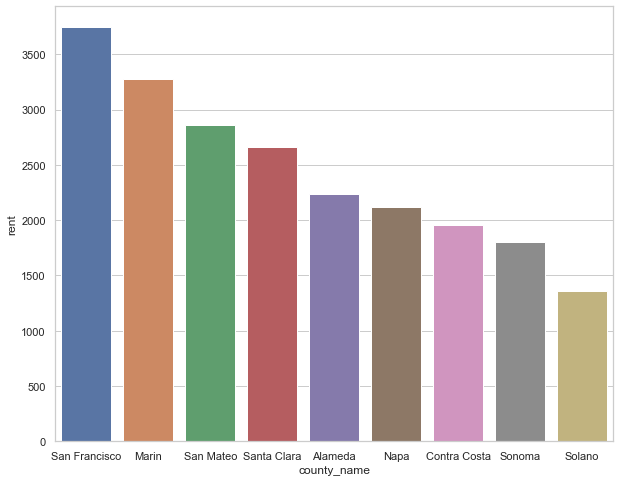

In [53]:
plt.figure(1, figsize=(10,8), )
sns.set_style("whitegrid")
sns.barplot(x="county_name", y="rent", data=county_rents)

We could improve on this a bit more by adding better axis labels, a title, and rotating the county names.

When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the hls color space, which is a simple transformation of RGB values.  Notice the palette option below.

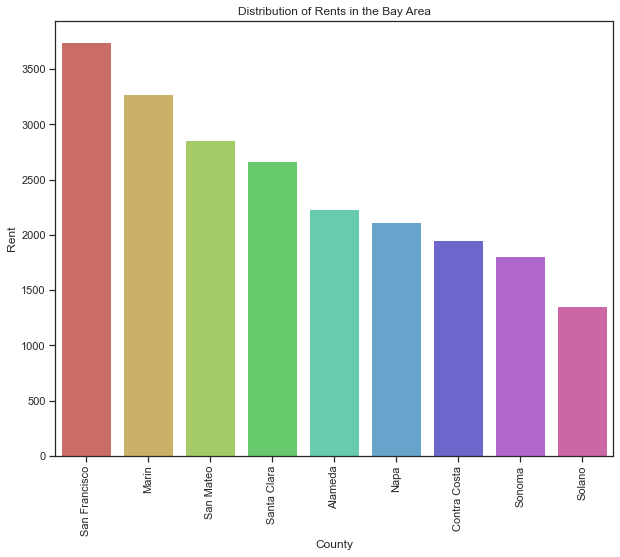

In [54]:
plt.figure(1, figsize=(10,8), )
sns.set_style("ticks")
ax = sns.barplot(x="county_name", y="rent", data=county_rents, palette=sns.color_palette("hls", 9))
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Rent')
ax.set_xlabel('County')
for item in ax.get_xticklabels():
    item.set_rotation(90)

There is also the hls_palette() function that lets you control the lightness and saturation of the colors.


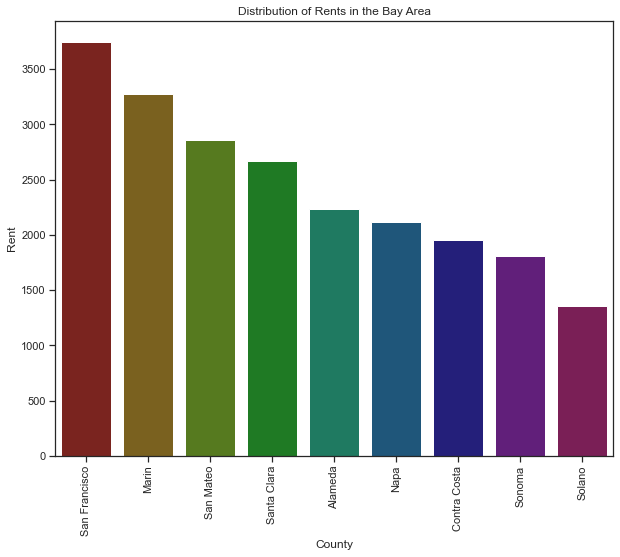

In [55]:
plt.figure(1, figsize=(10,8), )
sns.set_style("ticks")
ax = sns.barplot(x="county_name", y="rent", data=county_rents, palette=sns.hls_palette(9, l=.3, s=.8))
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Rent')
ax.set_xlabel('County')
for item in ax.get_xticklabels():
    item.set_rotation(90)

However, because of the way the human visual system works, colors that are even “intensity” in terms of their RGB levels won’t necessarily look equally intense. We perceive yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the hls system.

To remedy this, seaborn provides an interface to the husl system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.



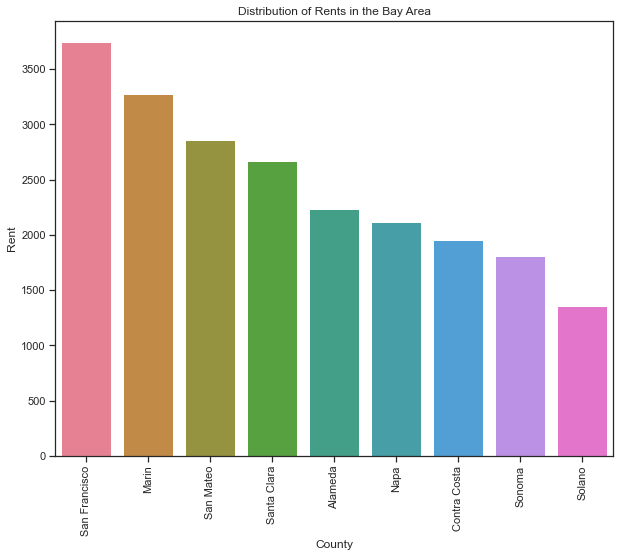

In [56]:
plt.figure(1, figsize=(10,8), )
sns.set_style("ticks")
ax = sns.barplot(x="county_name", y="rent", data=county_rents, palette=sns.color_palette("husl", 9))
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Rent')
ax.set_xlabel('County')
for item in ax.get_xticklabels():
    item.set_rotation(90)

### Visualizing Univariate Distributions

The plot below uses the rental data we plotted using a standard hist method of Pandas above, but uses the Seaborn *distplot* method instead.  This plots a histogram, normalized so that the bars area of the bars sum to 1, and superimposses a KDE plot.  KDE stands for Kernel Density Estimate, which provides a smoothed function that has the same property as the normalized histogram: the area under the curve sums to 1. Think of it as though it is a normalized histogram with a really large number of bars, and smoothed.  

This gives a good view of the distribution of the data where the y axis is a proportion of the data that is within each x-axis interval.

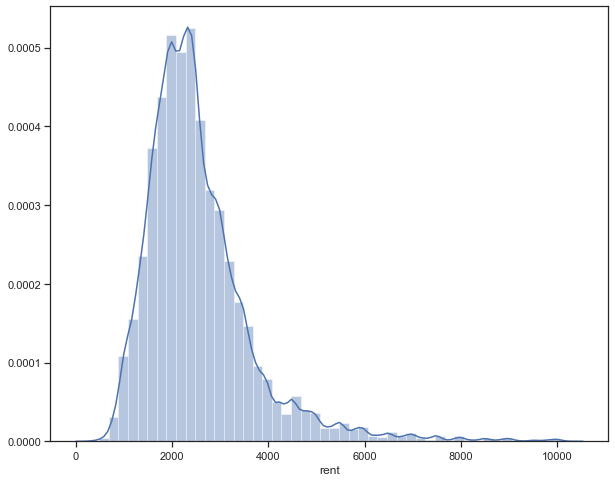

In [29]:
plt.figure(1, figsize=(10,8), )
sns.distplot(rentals['rent']);

If you want just the histogram component of this like before, but with nicer aesthetics like the grid, just suppress the kde plot.  You can also specify the number of bins, etc.

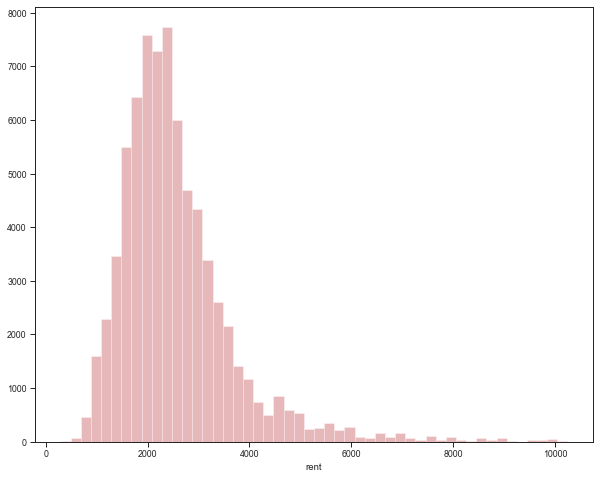

In [69]:
plt.figure(1, figsize=(10,8), )
sns.distplot(rentals['rent'], bins=50, color='r', kde=False);

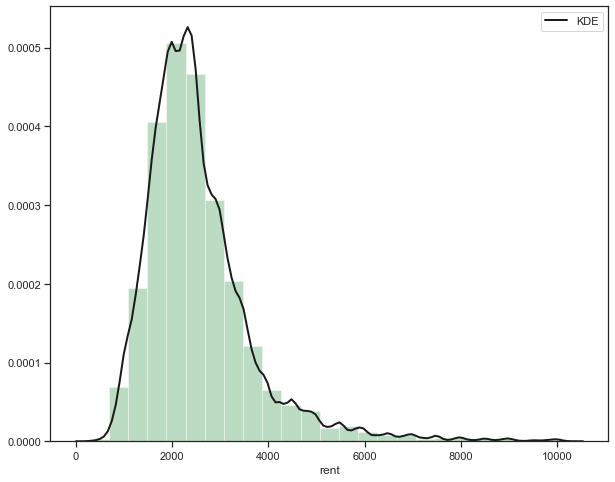

In [58]:
plt.figure(1, figsize=(10,8), )
sns.distplot(rentals['rent'], kde_kws={"color": "k", "lw": 2, "label": "KDE"}, bins=25, color='g')

Are our rents normally distributed?  We can superimpose a plot of a normal distribution fit to our data using a norm method of the Scipy stats library to visually inspect this.

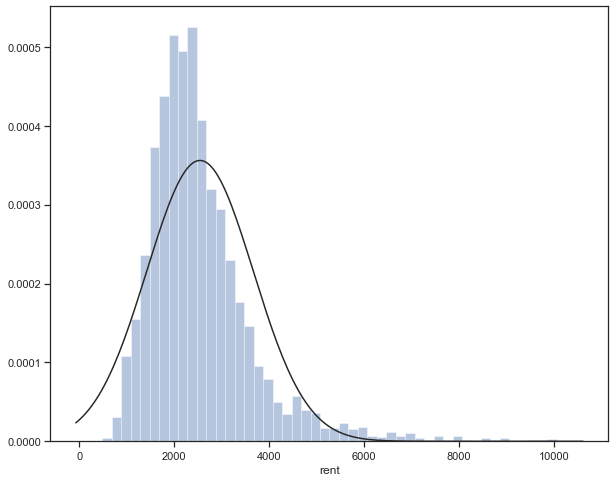

In [59]:
from scipy.stats import norm
plt.figure(1, figsize=(10,8), )
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)

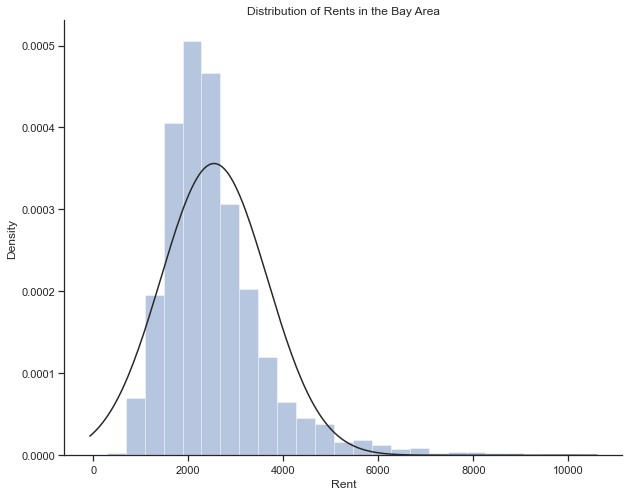

In [60]:
plt.figure(1, figsize=(10,8), )
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], bins=25, fit=norm, kde=False)
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Density')
ax.set_xlabel('Rent')
sns.despine()

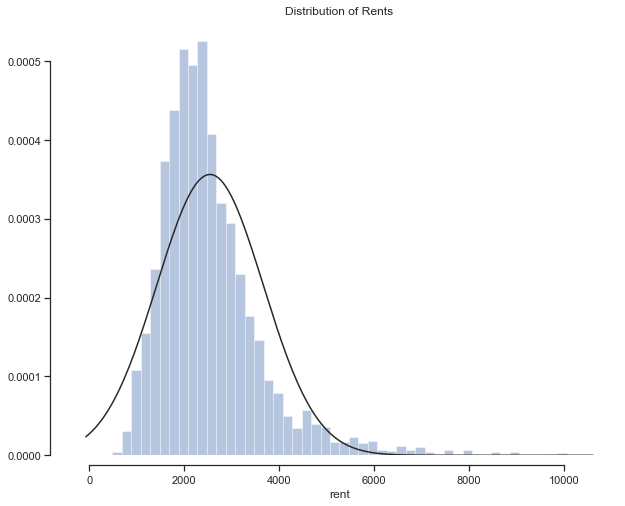

In [34]:
plt.figure(1, figsize=(10,8), )
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

### Context presets

Seaborn comes with four preset 'contexts' for graphs, which alter the graphical elements to be optimized for incuding in a *paper*, or using in a *talk*, or in a *notebook*, or printing on a *poster*.

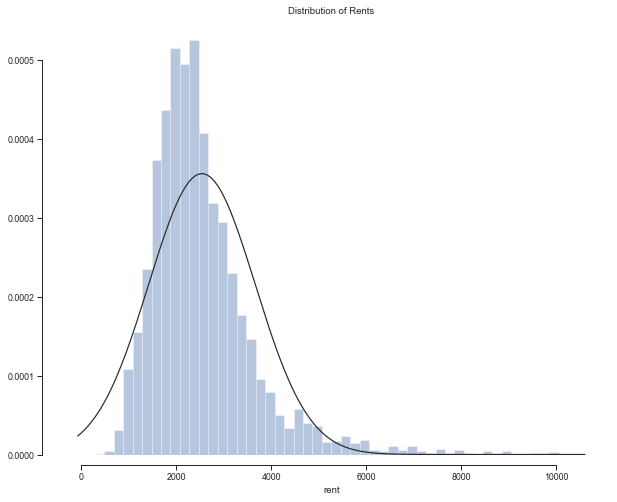

In [61]:
plt.figure(1, figsize=(10,8), )
sns.set_context("paper")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

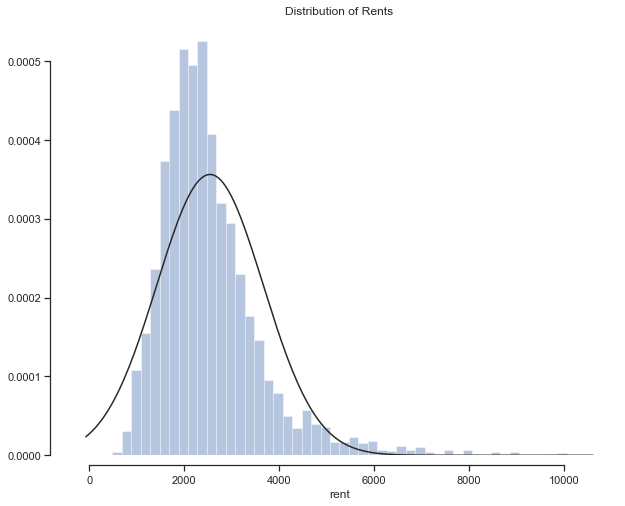

In [36]:
plt.figure(1, figsize=(10,8), )
sns.set_context("notebook")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

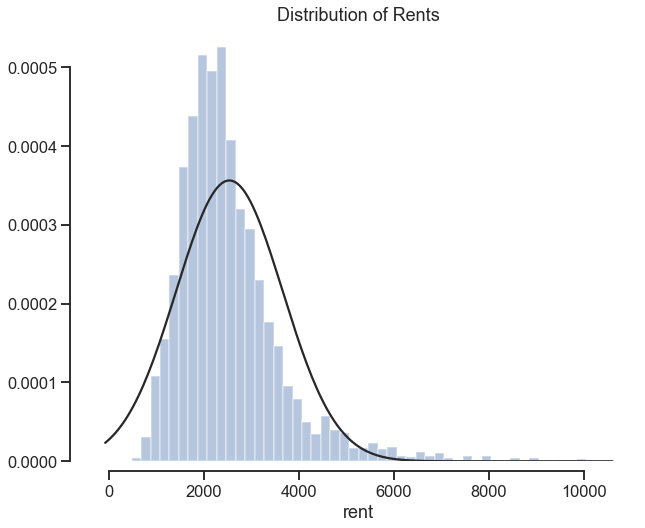

In [37]:
plt.figure(1, figsize=(10,8), )
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

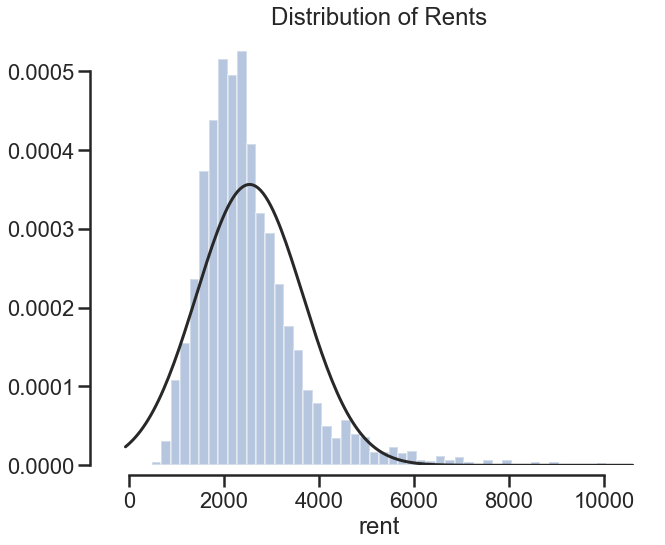

In [38]:
plt.figure(1, figsize=(10,8), )
sns.set_context("poster")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

### Dealing with Overplotting Issues

Recall the discussion of overplotting and how difficult it is to understand the distribution of data when data are overplotted. Let's revisit that and look at some options for addressing it.

First we look at the bivariate distribution with an ordinal variable and a continuous one.

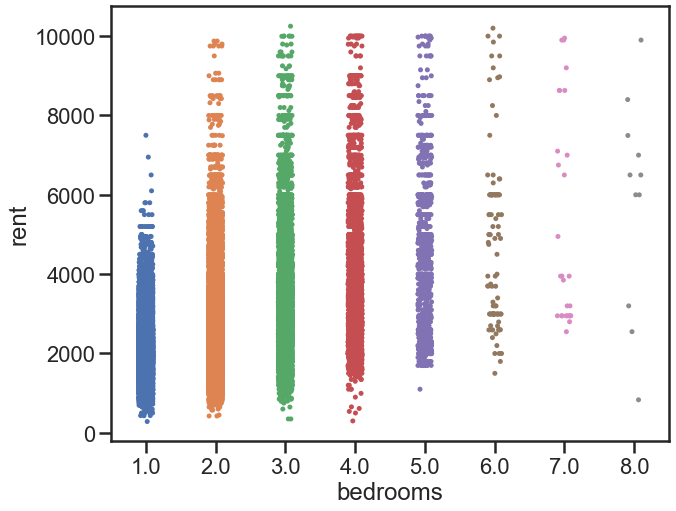

In [39]:
plt.figure(1, figsize=(10,8), )
sns.stripplot(x="bedrooms", y="rent", data=rentals);

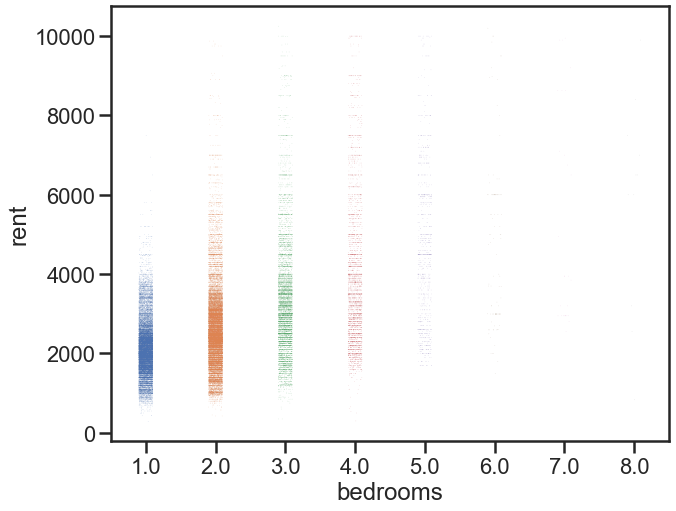

In [40]:
plt.figure(1, figsize=(10,8), )
sns.stripplot(x="bedrooms", y="rent", data=rentals, jitter=1, size=0.5, alpha=.5);

In [41]:
rentals.shape

(73863, 14)

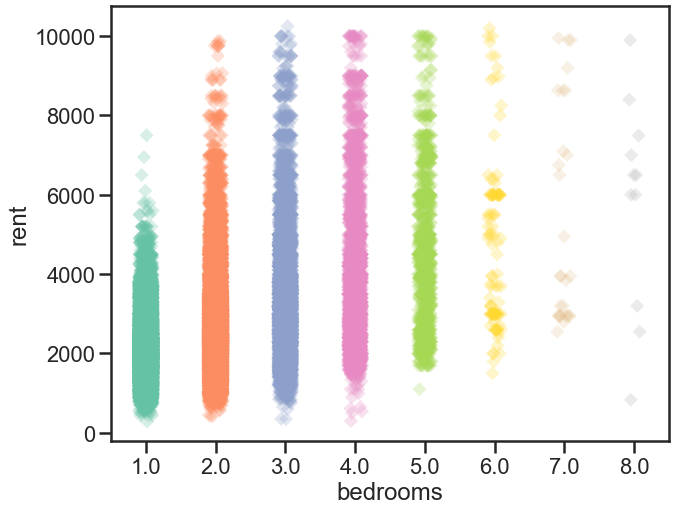

In [42]:
plt.figure(1, figsize=(10,8), )
ax =  sns.stripplot("bedrooms", "rent", data=rentals,
                   palette="Set2", size=10, marker="D",
                   edgecolor="gray", alpha=.25)

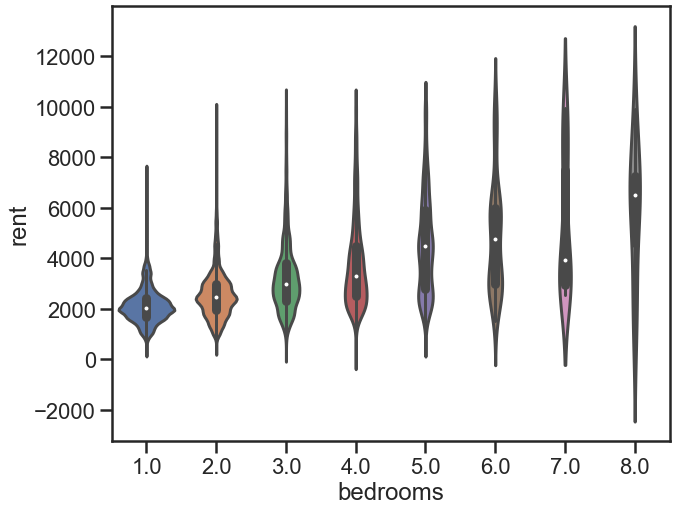

In [43]:
plt.figure(1, figsize=(10,8), )
sns.violinplot(x="bedrooms", y="rent", data=rentals)

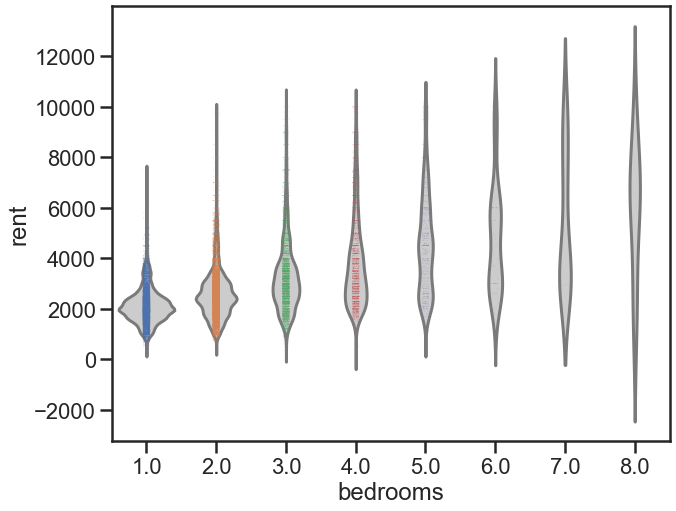

In [44]:
plt.figure(1, figsize=(10,8), )
ax = sns.violinplot(x="bedrooms", y="rent", data=rentals,
                    inner=None, color=".8")
ax = sns.stripplot(x="bedrooms", y="rent", data=rentals, jitter=0.05, size=0.5, alpha=.5);

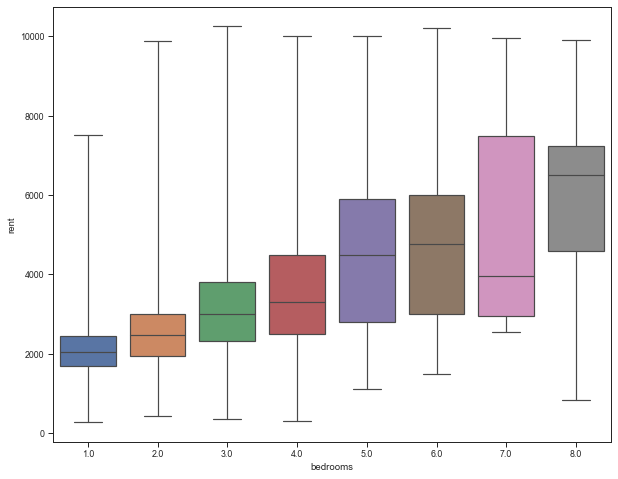

In [63]:
import numpy as np
plt.figure(1, figsize=(10,8), )
sns.boxplot(x="bedrooms", y="rent", data=rentals, whis=np.inf)

Now we look at a bivariate distribution with two continuous variables.

<Figure size 720x576 with 0 Axes>

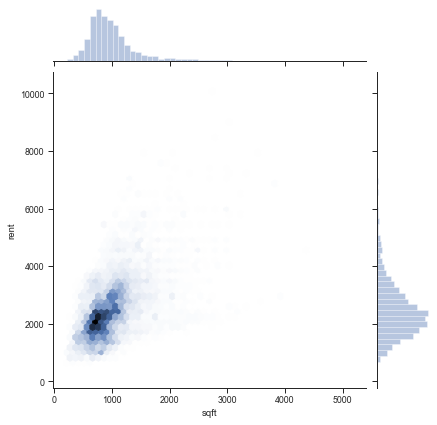

In [64]:
plt.figure(1, figsize=(10,8), )
sns.jointplot(x="sqft", y="rent", kind="hex", data=rentals);

In [65]:
rentals2 = rentals[(rentals['rent']<5000) & (rentals['sqft']>500) & (rentals['sqft']<1500)]

<Figure size 720x576 with 0 Axes>

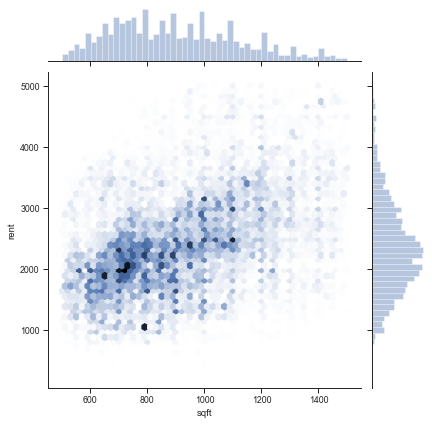

In [66]:
plt.figure(1, figsize=(10,8), )
sns.jointplot(x="sqft", y="rent", kind="hex", data=rentals2);

This next plot is a bit slow to generate. It uses a computationally expensive algorithm to generate a 2D density plot of the two variables.

<Figure size 720x576 with 0 Axes>

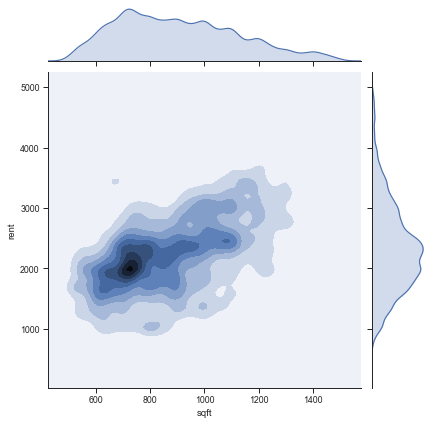

In [67]:
plt.figure(1, figsize=(10,8), )
sns.jointplot(x="sqft", y="rent", kind="kde", data=rentals2);

The final plot type we introduce using Seaborn is the pairplot, which allows you to generate a matrix of plots to explore relationships among more than two variables at a time in one grid.  This is also pretty slow.

<Figure size 792x720 with 0 Axes>

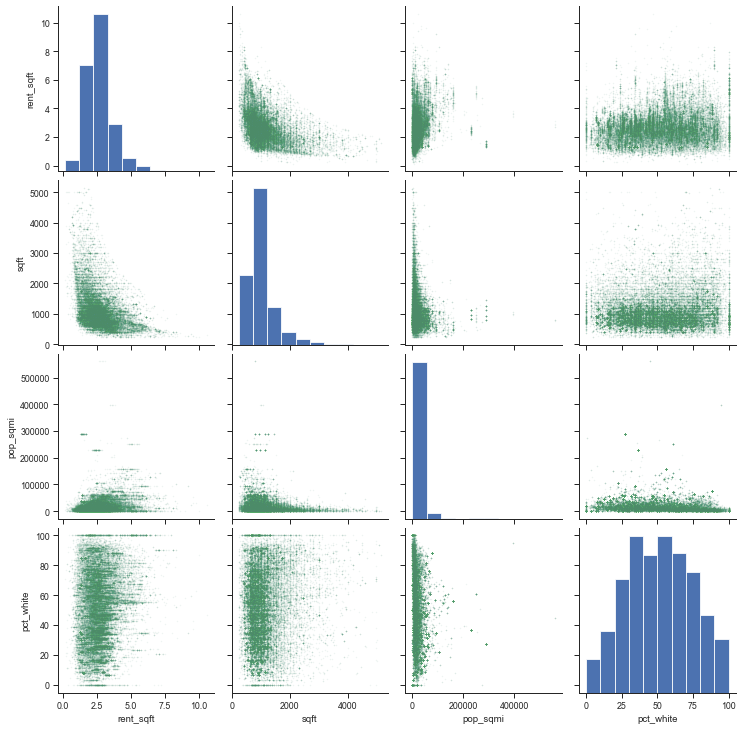

In [68]:
plt.figure(1, figsize=(11,10), )
sns.pairplot(rentals_sf1[['rent_sqft', 'sqft', 'pop_sqmi', 'pct_white']], 
    plot_kws = {'alpha': 0.05, 's': 1, 'edgecolor': 'g'});

Here is a short blog showing some other features of pairplot:
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

OK, that's it!  Find your own data and start using these data visualization tools to learn more from your data.